> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Luís Henrique Santos de Carvalho
* **Matrícula:**  4254

# Aula Prática 08
## Regressão Linear

**Objetivo:** Extrair correlação entre atributos de dados reais por meio da técnica de regressão linear.
**Pré-requisitos:** Linguagem de programação Python, estatística básica \
**Meta:** Ao final da prática, o aluno será capaz de preparar dados e extrair correlações interessantes a partir da aplicação da técnica de regressão linear, e prever valores numéricos contínuos.

----

In [1]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p8/weatherHistory.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for learntools-dados-ufv: filename=learntools_dados_ufv-1.0.8-py3-none-any.whl size=35070 sha256=85291131ebfcfb239f00e06b42e74f4df98b5cc653d4ed172d2da46a3da99a26
  Stored in directory: /tmp/pip-ephem-wheel-cache-xe22059h/wheels/11/e5/5e/f88b6970b4b406667866cfed7e68d4b5d0bf82ccb521e8cb90
Successfully built learntools-dados-ufv
--2022-07-07 22:56:52--  https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p8/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv’

weatherHistory.csv  100%[===================>]  15.54M  --.-KB/s    in 0.1s    

2022-07-07 22:56:53 (

In [2]:
#### Não altere essa célula!!! ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_8 import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Roteiro

## Carregando os dados

Vamos utilizar como exemplo um conjunto de dados que contém várias características e os preços de imóveis da cidade de Boston. O objetivo da regressão é gerar um modelo que permita prever o preço de um imóvel com base em suas características.

Esse conjunto de dados está na biblioteca `scikit-learn`.

In [3]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Observe que a variável `boston` é um dicionário/mapa/hash...

In [4]:
# Note que boston é um dicionário/mapa/hash
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distan

### Transformando o dataset em um DataFrame Pandas

In [7]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Os preços dos imóveis estão no campo target do conjunto original. Então, vamos colocar os preços como uma nova coluna (lembre, o preço é a variável dependente que queremos estimar utilizando regressão)

In [8]:
df['PRICE'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Avaliando relação par-a-par entre variáveis e o preço do imóvel

Antes de se criar um modelo de regressão, é importante avaliar as correlações entre todas as possíveis variáveis.

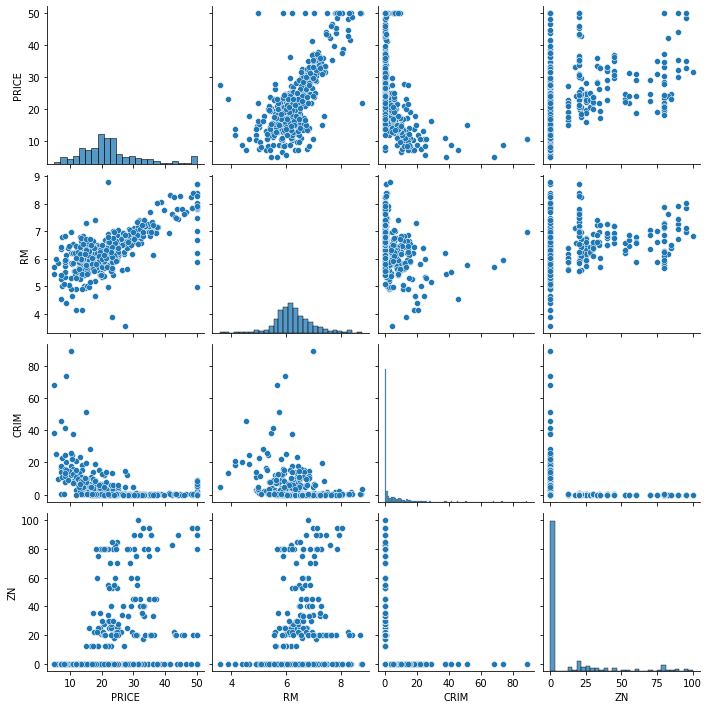

In [7]:
sns.pairplot(df[['PRICE','RM','CRIM','ZN']])

### Analisando o RM

Vamos olhar individualmente para o RM (Número de Quartos). Qual sua relação com o preço?

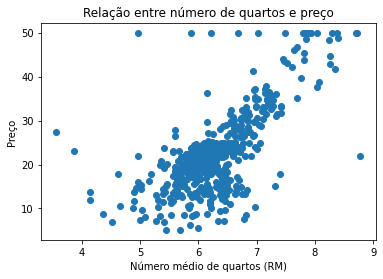

In [8]:
plt.scatter(df.RM, df.PRICE)
plt.xlabel('Número médio de quartos (RM)')
plt.ylabel('Preço')
plt.title('Relação entre número de quartos e preço')
plt.show()

#### Calculando a Correlação & Coeficiente de Pearson
Uma medida importante para saber se duas variáveis numéricas estão relacionadas é a Correlação de Pearson

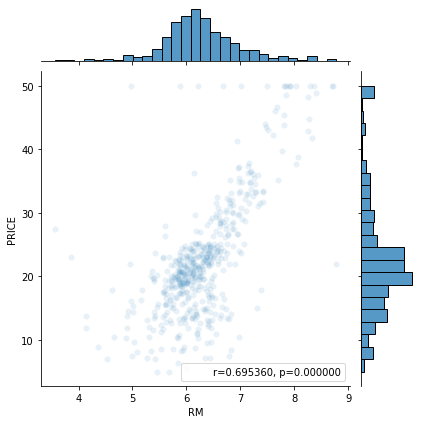

In [9]:
# sns.jointplot(x='RM', y='PRICE', data=df, alpha = 0.1, stat_func=pearsonr)

graph = sns.jointplot(data=df, x='RM', y='PRICE', alpha=0.1)
r, p = stats.pearsonr(df['RM'], df['PRICE'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

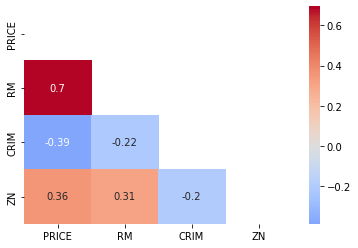

In [10]:
correlation_columns = ['PRICE','RM','CRIM','ZN']
correlation = df[correlation_columns].corr()
matrix = np.triu(df[correlation_columns].corr())
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, center=0, cmap='coolwarm', mask=matrix)

## Criando um modelo de regressão linear utilizando RM e PRICE

#### Funções importantes de LinearRegression:
- **lm.fit()** -> Fits a linear model;
- **lm.predict()** -> Predict Y using the linear model with estimated coefficients;
- **lm.score()** -> Returns the coefficient of determination (R^2). 

### Cenário 1:
- Variável Independente: `RM`
- Variável Dependente: `PRICE`

In [9]:
X = df.RM
Y = df.PRICE

lm = LinearRegression()
lm.fit(X.values.reshape(-1,1), Y)

print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1), Y))

Coeficiente estimado:  [9.10210898]
R2 (score):  0.48352545599133423


Ou seja, a cada aumento de uma unidade em RM (número de quartos), o preço aumenta em 9.10. O R2 (coeficiente de determinação) é de 0.48. Ou seja, 52% da variação do preço não é explicada pelo RM.

### Cenário 2:
Agora vamos fazer a regressão multi-variada. Para isso, vamos separar os atributos independentes (X) e o atributo dependente preço (Y), e criar uma instância da classe LinearRegression


- Variável Independente: `Todas colunas, exceto PRICE`
- Variável Dependente: `PRICE`

In [10]:
X = df.drop('PRICE', axis=1)
Y = df.PRICE

lm = LinearRegression()
lm.fit(X, Y)

print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X, Y))

Coeficiente estimado:  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
R2 (score):  0.7406426641094095


Observem como o R2 melhorou, ao adicionar as outras variáveis.

Agora, vamos apresentar os coeficientes estimados para todas as variáveis independentes

In [17]:
# Mostrar os coeficientes da regressão.
print('Intercept %.3f ' % lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

Intercept 36.459 


,Coefficient
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


Nesse caso, a equação linear ficaria assim:

**Equação**: `PRICE = 36.49 + CRIM * -0.10 + ZN * 0.04 + …. + LSTAT * -0.52`

### Prevendo preço de um imóvel que não se sabe o preço

A partir de um imóvel que se sabe as características, vamos prever qual o preço.

In [18]:
X = sm.add_constant(df.drop('PRICE', axis =1))
Y = df.PRICE

results = sm.OLS(Y, X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          6.72e-135
Time:                        13:26:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Podemos ver que `INDUS` e `AGE` apresentaram um valor-p alto, e o intervalo de confiança inclui o zero. Então, podemos remover essas duas variáveis, e vamos ver que o resultado não muda significativamente.

In [19]:
X = sm.add_constant(df.drop(['PRICE', 'AGE', 'INDUS'], axis=1))
Y = df.PRICE

results = sm.OLS(Y,X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          5.54e-137
Time:                        13:27:21   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Note que o R^2 continuou igual!

# Exercícios

Os exercícios abaixo são referentes ao conjunto de dados `weatherHistory` que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Execute e não remova a célula abaixo antes de iniciar os exercícios. Faça todas as atividades manipulando a variável `df`.

In [ ]:
# Atribui o dataframe com o estado "original" em uma variável isolada
original_df = pd.read_csv('./weatherHistory.csv')
df = original_df.copy()
df

In [98]:
df = original_df.copy()

## 1. Faça uma análise exploratória dos dados.
Antes de fazer a regressão, entenda as variáveis, e as suas possíveis relações entre elas.

Utilize de gráficos par a par e também **ESCREVA** quais variáveis você **observa através dos gráficos** com correlação fortes ou fracas.

Essa questão não possui verificação automática mas você pode pedir dicas com `q1.hint()`

In [58]:
q1.hint(3)

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 3:</span> Tente traçar uma linha no gráfico par a par. É fácil de ter uma reta que intercepta a maioria dos pontos?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


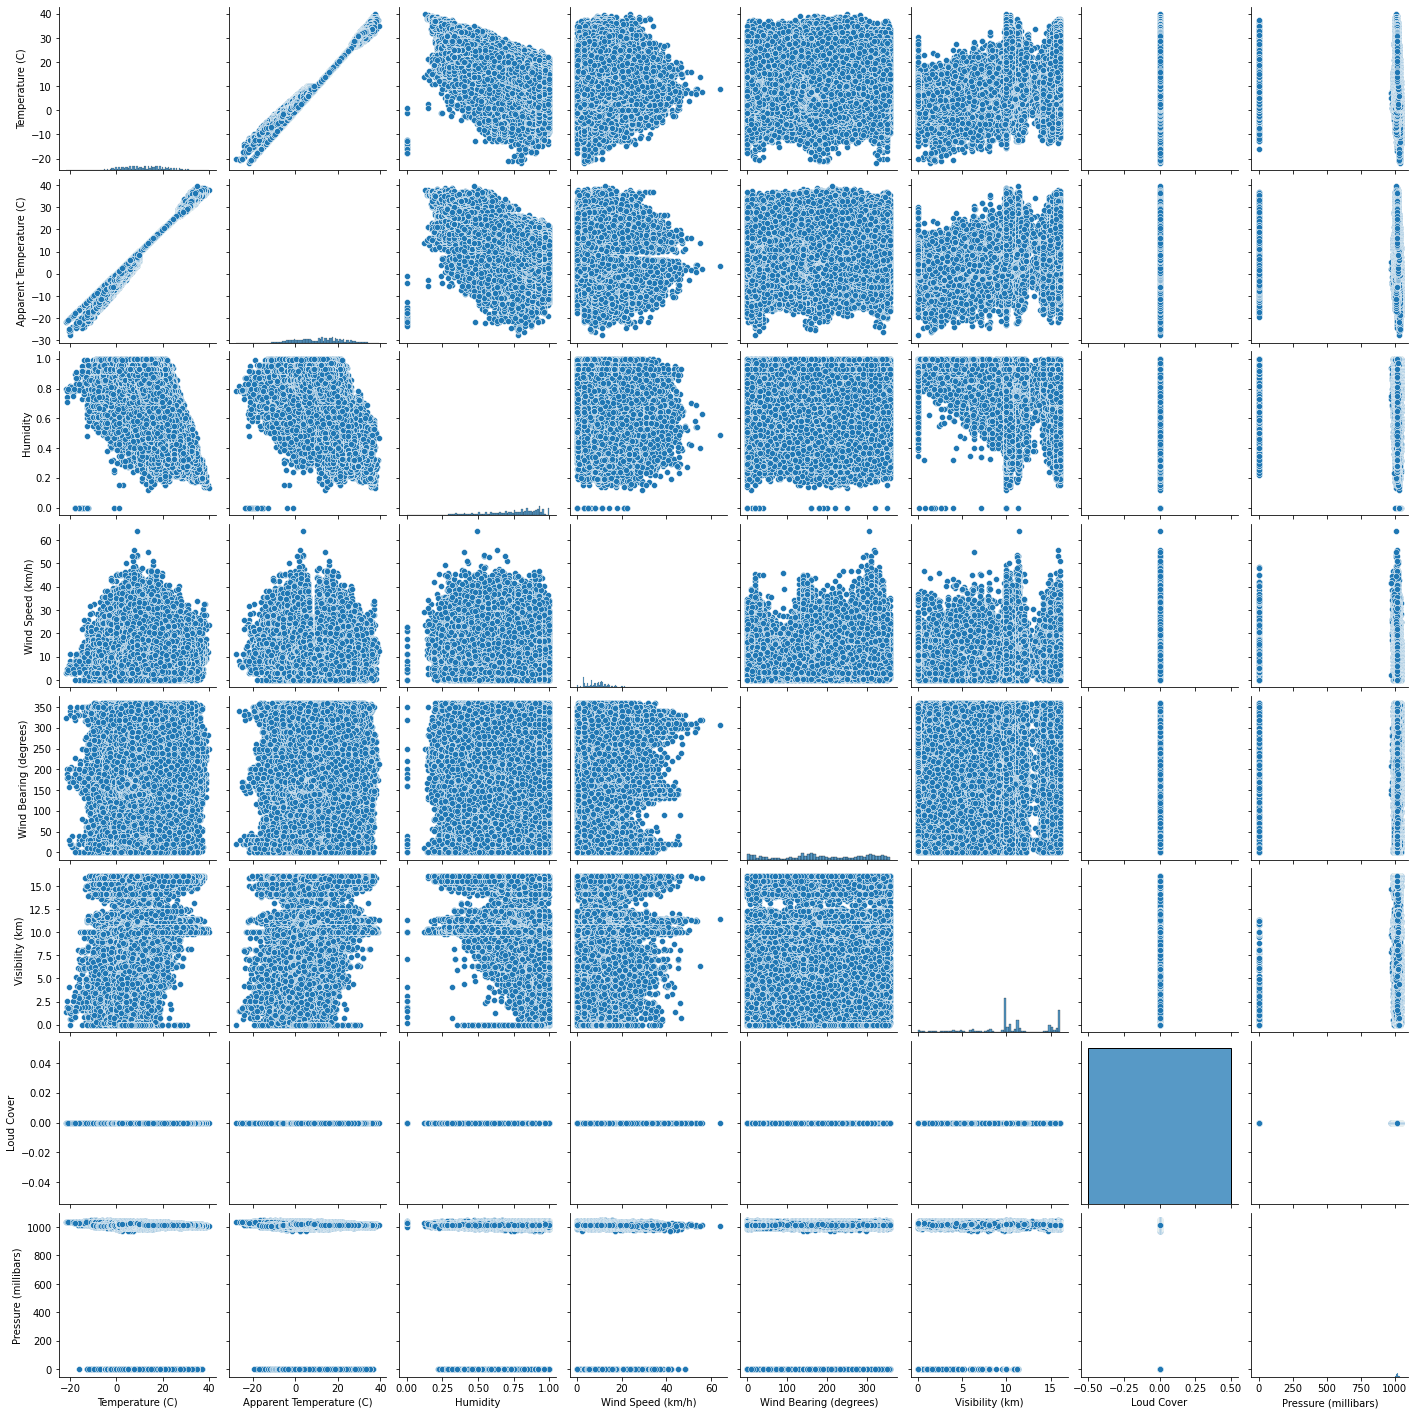

In [59]:
# INSIRA SEU CÓDIGO PARA CRIAR A ANÁLISE EXPLORATÓRIA 

df.info()

sns.pairplot(df[['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']])

In [60]:
df_pressao = df[df['Pressure (millibars)'] != 0]

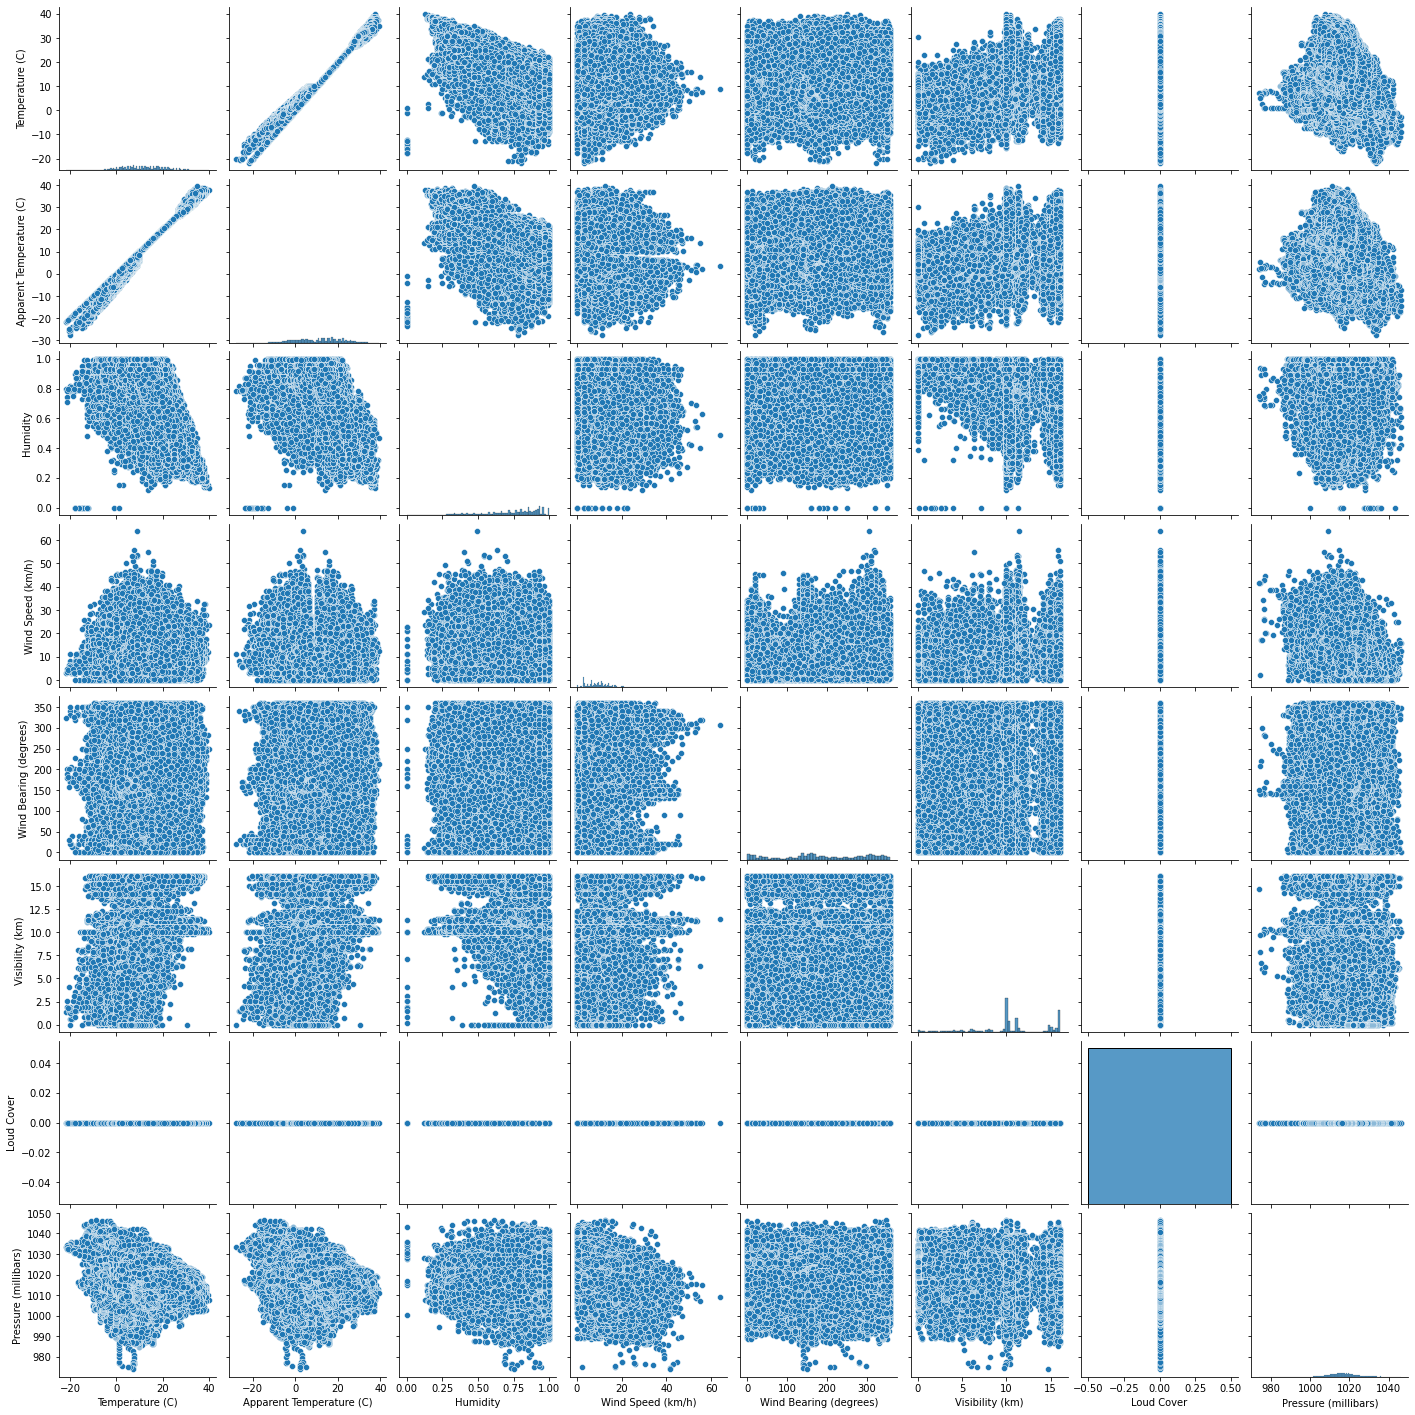

In [61]:
sns.pairplot(df_pressao[['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']])

#### RESPOSTA 1:

Realizando uma análise par a par sobre as variáveis do dataframe, podemos analisar principalmente uma correlação forte entre a temperatura e a sensação térmica (apparent temperature) o que faz bastante sentido visto que em termos técnicos as duas se assemelham relativamente bastante. De maneira geral, não foi possível analisar mais nenhuma correlação forte tendo em vista que a maioria das variáveis não se relacionam. Entretanto, algumas correlações apesar de não serem consideradas fortes, apresentam algum comportamento semelhante como temperatura e umidade.

Analisando de maneira mais aprofundada os valores, observa-se que os gráficos gerados com a variável pressão apresentam muitos valores nulos, caracterizando ruído. Apesar disso, mesmo removendo esse ruído não foi possível retirar mais informações de correlações.

## 2. Obtenha a Equação Linear que representa a temperatura em termos da umidade.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a regressão.

Essa questão não possui verificação automática mas você pode pedir dicas com `q2.hint()`

In [62]:
# INSIRA SEU CÓDIGO PARA CRIAR A REGRESSÃO

q2.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Identifique e atribua os valores de X e Y para ser alimentado em uma regressão linear.
(Para outra dica, chame `.hint(2)`)

In [15]:
X = df['Humidity']
Y = df['Temperature (C)']

lm = LinearRegression()
lm.fit(X.values.reshape(-1,1), Y)

print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1), Y))
print('Intercept %.3f ' % lm.intercept_)

Coeficiente estimado:  [-30.89438376]
R2 (score):  0.3997459740945124
Intercept 34.637 


#### Resposta 2:

- Coeficiente estimado: -30.89438376
- Coeficiente de determinação: 0.3997459740945124
- Equação Linear: Temperature = 34.637 + Humidity * (-30.89438376)

## 3. Obtenha a Equação Linear que representa a temperatura em termos da umidade E velocidade do vento.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a regressão.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

In [ ]:
# INSIRA SEU CÓDIGO PARA CRIAR A REGRESSÃO

q3.hint()

In [24]:
X = df[['Humidity','Wind Speed (km/h)']]
Y = df['Temperature (C)']

lm = LinearRegression()
lm.fit(X, Y)

print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X, Y))
print('Intercept %.3f ' % lm.intercept_)

Coeficiente estimado:  [-32.43736179  -0.19393433]
R2 (score):  0.4184534276004692
Intercept 37.867 


#### Resposta 3:

- Coeficiente estimado: -32.43736179 para Humidity e -0.19393433 para WindSpeed
- Coeficiente de determinação: 0.4184534276004692
- Equação Linear: 37.867 + Humidity * (-32.43736179) + WindSpeed * (-0.19393433)

## 4. Obtenha a Equação Linear que representa a temperatura aparente em termos da temperatura E umidade E velocidade do vento.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a regressão.

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

In [ ]:
# INSIRA SEU CÓDIGO PARA CRIAR A REGRESSÃO

q4.hint()

In [25]:
X = df[['Temperature (C)','Humidity','Wind Speed (km/h)']]
Y = df['Apparent Temperature (C)']

lm = LinearRegression()
lm.fit(X, Y)

print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X, Y))
print('Intercept %.3f ' % lm.intercept_)

Coeficiente estimado:  [ 1.12592366  1.05544552 -0.09486983]
R2 (score):  0.989812786297048
Intercept -2.330 


#### Resposta 4:

- Coeficiente estimado: 1.12592366 para Temperature, 1.05544552 para Humidity e -0.09486983 para Wind Speed
- Coeficiente de determinação: 0.989812786297048
- Equação Linear: -2.330 + Temperature * (1.12592366) + Humidity * (1.05544552) + WindSpeed * (-0.09486983) 

## 5. Quais variáveis do dataset você indica para serem utilizadas para prever a umidade? EVIDENCIE e EXPLIQUE sua resposta.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a sua análise.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

In [117]:
df = original_df.copy()

In [ ]:
# INSIRA SEU CÓDIGO PARA CRIAR A ANÁLISE

q5.hint()

In [118]:
df_umidade = df
df_umidade['Precip Type'] = df_umidade['Precip Type'].apply(lambda x: 1 if x == 'snow' else 0)
colunas = ['Temperature (C)',  'Pressure (millibars)', 'Precip Type']

In [122]:
import statsmodels.api as sm

In [125]:
X = df[colunas]
Y = df['Humidity']
results = sm.OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Humidity   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          5.311e+05
Date:                Fri, 08 Jul 2022   Prob (F-statistic):                        0.00
Time:                        01:03:50   Log-Likelihood:                          27643.
No. Observations:               96453   AIC:                                 -5.528e+04
Df Residuals:                   96450   BIC:                                 -5.525e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

#### Resposta 5:
Analisando as colunas do dataframe, e também os gráficos par a par, podemos observar e eliminar previamente algumas variáveis que não tem correlação nenhuma com os níveis de umidade medidos durante esse período de tempo. Velocidade e direção do vento ou visibilidade além das colunas não numéricas como resumo diário não apresentam correlação nenhuma com a variável a ser analisada. 

Entretando, uma variável não numérica que pode apresentar alguma relação com a umidade é a Precip Type que varia entre "snow" e "rain" e afeta diretamente nos níveis de umidade, uma vez que precipitações chuvosas elevam a variável em questão. Desse modo, o dataframe foi filtrado de modo a relacionar o numero 1 com a ocorrencia de neve e 0 com ocorrencia de chuva.

Ao final, foi feita uma regressão linear com as variáveis temperatura, pressão e tipo de precipitação obtendo assim um valor R^2 ajustado de 0.943 indicando a correlação entre essas variáveis.